In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
path = os.path.expanduser("~/Documents/m6A/")
exon_m6AQTL = f"{path}/Data/exon_m6AQTLs.txt"
output_exon_m6AQTL = f"{path}/Data/exon_m6AQTLs.bed"
intron_m6AQTL = f"{path}/Data/intron_m6AQTLs.txt"
output_intron_m6AQTL = f"{path}/Data/intron_m6AQTLs.bed"
output_dbSNP = f"{path}/Data/dbSNP/dbSNP.vcf.gz"
n = 200

#### Import dbSNP and export the first five columns, only need to do it once

In [2]:
# input_dbSNP = f"{path}/Data/dbSNP/common_all_20170710.vcf.gz"
# dbSNP = pd.read_table(input_dbSNP, header = 56, compression = "gzip", usecols = [0,1,2,3,4], low_memory = False)
# dbSNP.to_csv(output_dbSNP, compression = "gzip", sep = "\t", index = False)

#### Handle m6AQTL data
1. sort by chromosome and pos
2. plus and minus 200 for each pos

In [5]:
m6AQTL = pd.read_table(intron_m6AQTL, header = 0)
m6AQTL = m6AQTL.sort_values(by = ["chr", "pos"])
m6AQTL = m6AQTL.set_index([[i for i in range(m6AQTL.shape[0])]])
m6AQTL["strand"] = m6AQTL.apply(lambda row: row["peakID"].split("_")[-1], axis = 1)
m6AQTL["gene_symbol"] = m6AQTL.apply(lambda row: row["peakID"].split("_")[0], axis = 1)
m6AQTL["start"] = m6AQTL.apply(lambda row: int(row["peakID"].split("_")[1]), axis = 1)
m6AQTL["end"] = m6AQTL.apply(lambda row: int(row["peakID"].split("_")[2]), axis = 1)
m6AQTL["width"] = m6AQTL.apply(lambda row: row["end"] - row["start"], axis = 1)
m6AQTL["pos1"] = m6AQTL.apply(lambda row: row["pos"] - n, axis = 1)
m6AQTL["pos2"] = m6AQTL.apply(lambda row: row["pos"] + n, axis = 1)
m6AQTL["gap"] = m6AQTL.apply(lambda row: row["start"] - row["pos"], axis = 1)
m6AQTL["in"] = m6AQTL.apply(lambda row: 1 if row["pos"] >= row["start"] and row["pos"] <=row["end"] else 0, axis=1)
out_cols = ["chr", "pos1", "pos2", "gene_symbol", "width", "strand"]
m6AQTL[out_cols].to_csv(output_intron_m6AQTL, index = False, header = False, sep = "\t")

In [ ]:
dbSNP = pd.read_table(output_dbSNP, compression = "gzip", header = 0, sep = "\t", low_memory = False)

In [53]:
dbSNP.head(5)

,#CHROM,POS,ID,REF,ALT
0,1,10177,rs367896724,A,AC
1,1,10352,rs555500075,T,TA
2,1,10352,rs145072688,T,TA
3,1,10616,rs376342519,CCGCCGTTGCAAAGGCGCGCCG,C
4,1,10642,rs558604819,G,A


In [31]:
m6AQTL[["chr", "pos", "snpID", "start", "end", "width", "pos1", "pos2", "gene_symbol", "gap", "strand"]].head(10)

,chr,pos,snpID,start,end,width,pos1,pos2,gene_symbol,gap,strand
0,chr1,899937,rs143296006,981788,981988,200,899737,900137,AGRN,81851,+
1,chr1,899938,rs147467971,981788,981988,200,899738,900138,AGRN,81850,+
2,chr1,899942,rs71509448,981788,981988,200,899742,900142,AGRN,81846,+
3,chr1,943468,rs3121567,949466,949516,50,943268,943668,ISG15,5998,+
4,chr1,945612,rs3121565,949466,949516,50,945412,945812,ISG15,3854,+
5,chr1,945861,rs150242145,949466,949516,50,945661,946061,ISG15,3605,+
6,chr1,946127,rs34487852,949466,949516,50,945927,946327,ISG15,3339,+
7,chr1,946135,rs9723307,949466,949516,50,945935,946335,ISG15,3331,+
8,chr1,947034,rs2465126,949466,949516,50,946834,947234,ISG15,2432,+
9,chr1,947538,rs2465125,949466,949516,50,947338,947738,ISG15,1928,+


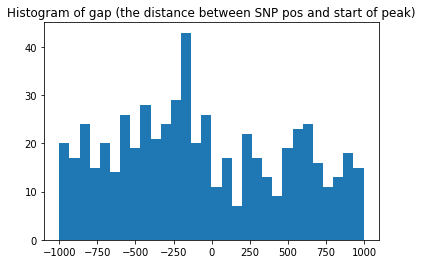

In [52]:
n1 = 1000
# gap = m6AQTL["gap"].tolist()
gap = m6AQTL[(m6AQTL["gap"] <= n1) & (m6AQTL["gap"] >= -n1)]["gap"].tolist()
plt.hist(gap, bins = 30)
plt.title("Histogram of gap (the distance between SNP pos and start of peak)")
plt.show()

In [18]:
res = pd.merge(m6AQTL, dbSNP, how = "inner", left_on = ["pos", "snpID"], right_on = ["POS", "ID"])

In [23]:
res1 = res[["#CHROM", "POS", "ID", "REF", "ALT", "strand", "start", "end", "width", "gene_symbol", 
            "pos1", "pos2", "beta", "FDR"]]

In [27]:
res1.head(10)

,#CHROM,POS,ID,REF,ALT,strand,start,end,width,gene_symbol,pos1,pos2,beta,FDR
0,1,899937,rs143296006,G,T,+,981788,981988,200,AGRN,899737,900137,0.209051,0.099675
1,1,899938,rs147467971,G,"C,T",+,981788,981988,200,AGRN,899738,900138,0.209051,0.099675
2,1,899942,rs71509448,G,A,+,981788,981988,200,AGRN,899742,900142,0.256919,0.053348
3,1,943468,rs3121567,T,C,+,949466,949516,50,ISG15,943268,943668,0.175897,0.081956
4,1,945612,rs3121565,C,T,+,949466,949516,50,ISG15,945412,945812,0.193259,0.040843
5,1,945861,rs150242145,ATTAT,A,+,949466,949516,50,ISG15,945661,946061,0.191278,0.009500
6,1,946127,rs34487852,GT,G,+,949466,949516,50,ISG15,945927,946327,0.186970,0.047550
7,1,946135,rs9723307,T,G,+,949466,949516,50,ISG15,945935,946335,0.186970,0.047550
8,1,947034,rs2465126,G,A,+,949466,949516,50,ISG15,946834,947234,0.195956,0.007407
9,1,947538,rs2465125,C,T,+,949466,949516,50,ISG15,947338,947738,0.183229,0.045959


### Use "bedtools" in bash under the depository
`~/Documents/m6A/Data/metApeakFisher`
```
bedtools intersect -a ../intron_m6AQTLs.bed -b peaks.merged.bed -s > peak.merged.m6AQTL.bed
```

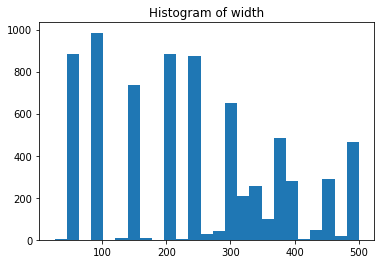

In [55]:
n2 = 500
width = m6AQTL[m6AQTL["width"] <= n2]["width"].tolist()
plt.hist(width, bins = 25)
plt.title("Histogram of width")
plt.show()

In [ ]:
@NTCNCCACCC:K00180:212:H7VCTBBXX:3:1101:21673:1033 1:N:0:NAATTCGT+AGGCTNTA
@NCGNTCAAGA:K00180:212:H7VCTBBXX:3:1101:21755:1033 1:N:0:NAATTCGT+AGGCTNTA
@NCTNCCCGAG:K00180:212:H7VCTBBXX:3:1101:21795:1033 1:N:0:NAATTCGT+AGGCTNTA
@NTCNTCCAAC:K00180:212:H7VCTBBXX:3:1101:22465:1033 1:N:0:NAATTCGT+AGGCTNTA

In [ ]:
@<instrument>:<run number>:<flowcell ID>:<lane>:<tile>:<x-pos>:<y-pos> <read>:<is filtered>:<control number>:<sample number>